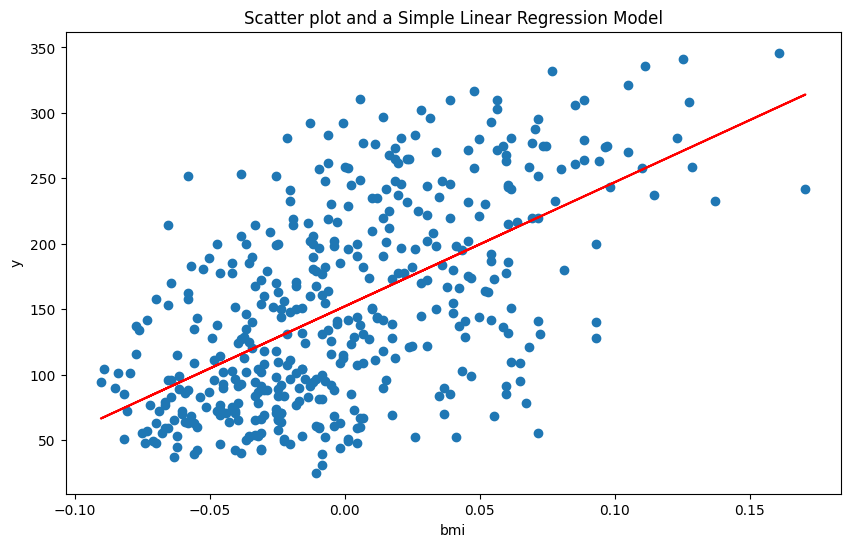

-3906.91899010684
-3000.381032839051


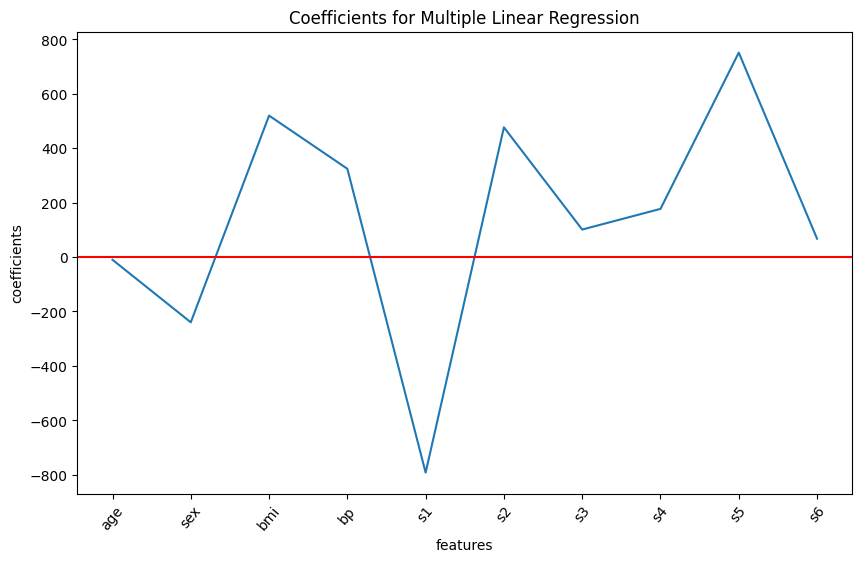

The best value of alpha is: {'alpha': 0.04}
The best score for the best Ridge estimator is: -2997.186793719345


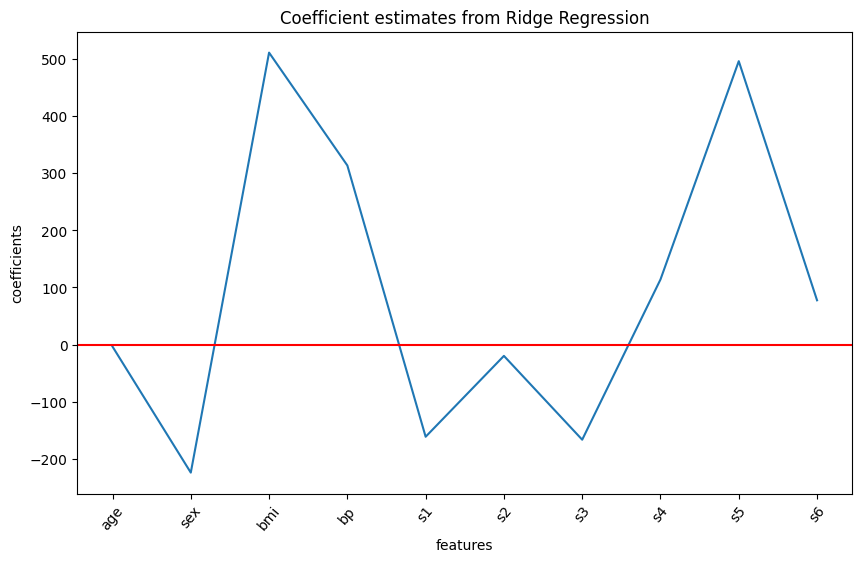

The best value of alpha is: {'alpha': 0.06}
The best score for the best Lasso estimator is: -2987.4180821246437


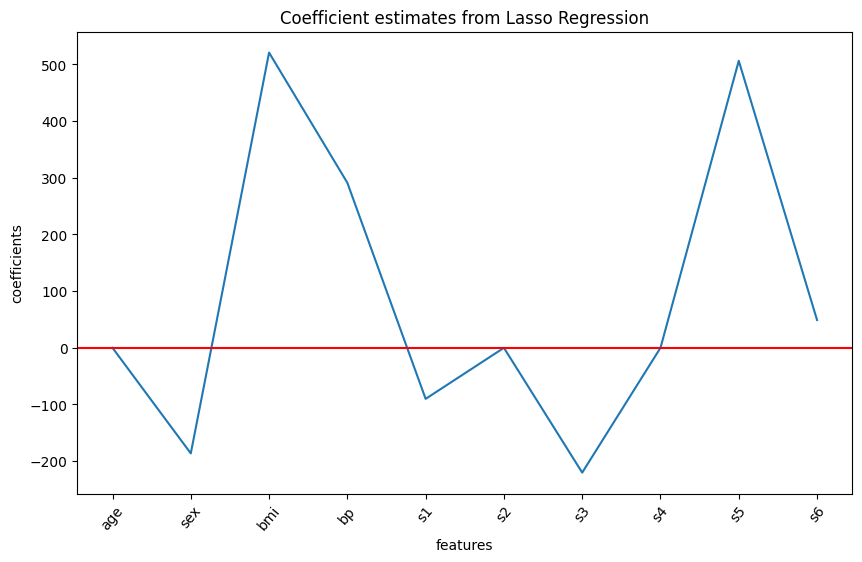

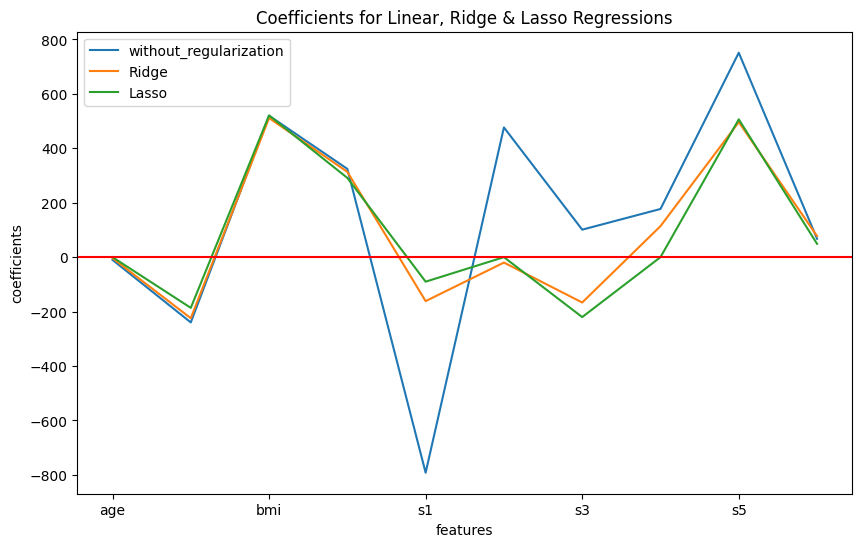

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
#%matplotlib inline
import sklearn

from sklearn import datasets
diabetes = datasets.load_diabetes()

df=pd.DataFrame(diabetes.data)
df.columns= diabetes.feature_names
# Creating a new column containing response variable 'y' (a quantitative measure of disease progressionone year after baseline)
df['diabetes_measure']=diabetes.target
df.head()

# Creating the feature matrix X
X=df.iloc[:,:-1]
# Creating the response vector y
y=df.iloc[:,-1]

# Choosing 'bmi' as the only feature from the feature matrix X and reshaping the array to 2 dimensions
bmi = X.iloc[:,2].to_numpy()
bmi=bmi[:,np.newaxis]
# Choosing 'diabetes_measure' as the response variable and reshaping the array to 2 dimensions
y= df.iloc[:,-1].to_numpy()
y=y[:,np.newaxis]

# importing the LinearRegression class from linear_model submodule of scikit learn
from sklearn.linear_model import LinearRegression
# instantiating
simple_lr = LinearRegression()
# Fitting the simple_lr object to the data
simple_lr = LinearRegression().fit(bmi,y)
# predicting the response values and saving them in an object called predicted_y
predicted_y = simple_lr.predict(bmi)

# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(bmi, y)
plt.plot(bmi, predicted_y, c='r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel("y")
plt.xlabel("bmi")
plt.show()

# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score
# storing the ten scores in an object called mse
mse= cross_val_score(simple_lr,bmi,y,scoring='neg_mean_squared_error',cv=10)
# taking the mean of mse for using as an indicator of how good the model is
print(mse.mean())

# importing the LinearRegression class from linear_model submodule of scikit learn
from sklearn.linear_model import LinearRegression
# instantiating
multiple_lr = LinearRegression()
# Fitting the multiple_lr object to the data , this time using the whole feature matrix X
multiple_lr = LinearRegression().fit(X,y)
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score
# storing the ten scores in an object called mse
mse= cross_val_score(multiple_lr,X,y,scoring='neg_mean_squared_error',cv=10)
# taking the mean of mse for using as an indicator of how good the model is
print(mse.mean())

# Saving an array containing all the ten coefficients
multiple_lr_coeffs = multiple_lr.coef_[0]
multiple_lr_coeffs

# fetching feature names from the dataframe df
feature_names = df.drop('diabetes_measure',axis=1).columns
feature_names

# Using matplotlib commands to plot
plt.figure(figsize=(10,6))
plt.plot(range(len(multiple_lr_coeffs)),multiple_lr_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

# X.corr().style.background_gradient(cmap='coolwarm')

# importing the Ridge class from linear_model submodule of scikit learn
from sklearn.linear_model import Ridge
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV
# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',ridge.fit(X,y).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',ridge.fit(X,y).best_score_)

# Creating an object containing the best ridge regression model
best_ridge_model= Ridge(alpha=0.04)
# Extracting the coefficient estimates for all ten features
best_ridge_coeffs = best_ridge_model.fit(X,y).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_ridge_coeffs[0])
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

# importing the Lasso class from linear_model submodule of scikit learn
from sklearn.linear_model import Lasso
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV
# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# Passing in a Lasso estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
lasso= GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',lasso.fit(X,y).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Lasso estimator is:',lasso.fit(X,y).best_score_)

# Creating an object containing the best Lasso regression model
best_lasso_model= Lasso(alpha=0.06)
# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X,y).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_lasso_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

# Highlighting coefficient estimates with value '0'
def color_red_for_zero(value):
    color = 'red' if value == 0 else 'black'
    return 'color: %s' % color

best_lasso_coeffs


# Creating a dataframe containing coefficient estimates from three models
comparing_models = pd.DataFrame({'without_regularization':multiple_lr_coeffs,
 'Ridge':best_ridge_coeffs[0],
 'Lasso':best_lasso_coeffs},
 index=feature_names)

    
# comparing_models= comparing_models.style.applymap(color_red_for_zero)
# comparing_models

comparing_models.plot(figsize=(10, 6))
plt.axhline(0, color='r', linestyle='solid')
plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

